In [1]:
import pickle
import pandas as pd
X_train = pd.read_csv('../data/X_train_trans.csv', index_col=0)
pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

### KNN vanilla model with train data
- average precision score after cross validation is 0.885

In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [3]:
#creating a confusion matrix template
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion Matrix, without normalization
[[1986    9]
 [ 193  145]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1995
           1       0.94      0.43      0.59       338

    accuracy                           0.91      2333
   macro avg       0.93      0.71      0.77      2333
weighted avg       0.92      0.91      0.90      2333

roc_auc_score: 0.712241402322374


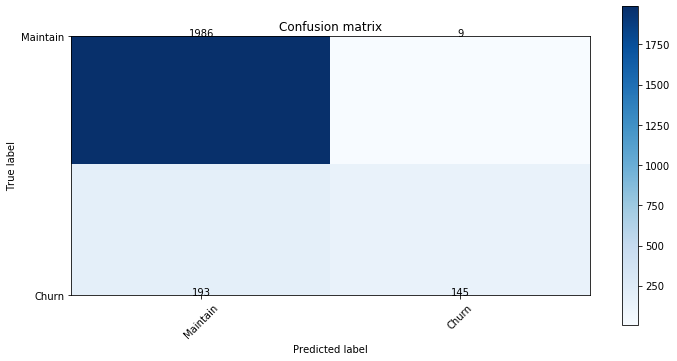

In [4]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred))

In [5]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(knn, X_train, y_train, cv=5, scoring= 'precision')

In [6]:
np.average(scores1)

0.8850300287947347

#### Finding the best n_neighbor parameter (K) for KNN
- K = 4

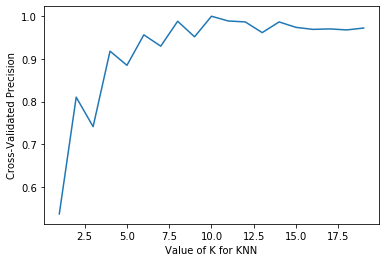

In [7]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 20
k_range = range(1, 20)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='precision')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Precision')
plt.show()

### KNN model with K=4
- average precision score from cross validation increased to 0.918

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Confusion Matrix, without normalization
[[1978   17]
 [ 156  182]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1995
           1       0.94      0.43      0.59       338

    accuracy                           0.91      2333
   macro avg       0.93      0.71      0.77      2333
weighted avg       0.92      0.91      0.90      2333

roc_auc_score: 0.712241402322374


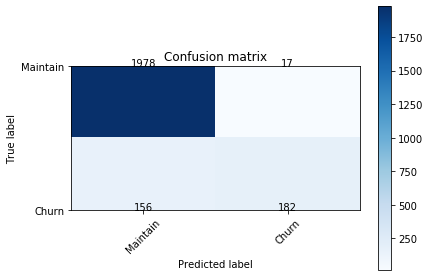

In [9]:
y_pred2 = knn2.predict(X_train)
# confusion_matrix(y_train, y_pred)

cm = confusion_matrix(y_train, y_pred2)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

# #Checking performance our model with classification report.
print(classification_report(y_train, y_pred))
#Checking performance our model with ROC Score.
print ('roc_auc_score:', roc_auc_score(y_train, y_pred))

In [10]:
scores2 = cross_val_score(knn2, X_train, y_train, cv=5, scoring= 'precision')

In [11]:
np.average(scores2)

0.7413287321198071